In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       # print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_dir = "/kaggle/input/nike-adidas-and-converse-imaged/train"
test_dir = "/kaggle/input/nike-adidas-and-converse-imaged/test"

In [4]:
# Normalización 
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 711 images belonging to 3 classes.
Found 21 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [6]:
# Creo una lista con las clases.
classes = ["converse", "nike", "adidas"]

In [7]:
classes

['converse', 'nike', 'adidas']

In [8]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

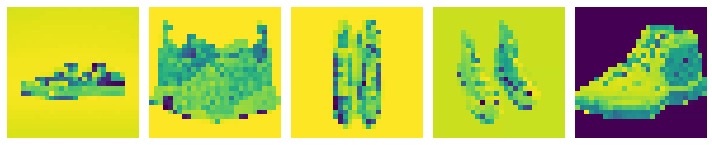

In [9]:
# Salen verdes por la normalización -- 
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

## MODELO BASE (Primer Modelo)

In [10]:
model_base = tf.keras.models.Sequential([
                                        tf.keras.layers.Flatten(input_shape = (28,28,1)),# Entrada imagenes de 28x28x1 Flatten: Convierte la matriz en un array
                                        tf.keras.layers.Dense(256, activation = "relu"), #  
                                        tf.keras.layers.Dense(128, activation = "relu"), # 
                                        tf.keras.layers.Dense(len(classes), activation = "softmax") # softmax define la probabilidad de que la prediccion corresponda a una clase 
])

2022-08-25 04:17:47.673177: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 234,243
Trainable params: 234,243
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Se entrena el modelo:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
history = model_base.fit(
    train_generator,
    epochs = 20, 
    validation_data = validation_generator
)

2022-08-25 04:17:48.119062: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
6/6 [==============================] - 6s 819ms/step - loss: 1.3288 - accuracy: 0.3446 - val_loss: 1.0869 - val_accuracy: 0.3810
Epoch 2/20
6/6 [==============================] - 2s 266ms/step - loss: 1.1264 - accuracy: 0.3376 - val_loss: 1.1302 - val_accuracy: 0.4286
Epoch 3/20
6/6 [==============================] - 2s 278ms/step - loss: 1.0893 - accuracy: 0.3812 - val_loss: 1.0796 - val_accuracy: 0.3810
Epoch 4/20
6/6 [==============================] - 2s 290ms/step - loss: 1.0754 - accuracy: 0.3966 - val_loss: 1.0956 - val_accuracy: 0.5238
Epoch 5/20
6/6 [==============================] - 2s 265ms/step - loss: 1.0853 - accuracy: 0.3840 - val_loss: 1.0726 - val_accuracy: 0.3810
Epoch 6/20
6/6 [==============================] - 2s 247ms/step - loss: 1.0535 - accuracy: 0.4430 - val_loss: 1.0525 - val_accuracy: 0.4286
Epoch 7/20
6/6 [==============================] - 2s 253ms/step - loss: 1.0382 - accuracy: 0.4712 - val_loss: 1.0648 - val_accuracy: 0.4286
Epoch 8/20
6/6 [====

In [13]:
# Se valida el modelo para ver los resultados:
results = model_base.evaluate(test_generator)

1/1 [==============================] - 0s 279ms/step - loss: 1.0544 - accuracy: 0.4035


In [14]:
# Crear una funcion de visualización de resultados 
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(19,9)

  ax[0].plot(epochs, train_acc, "go-", label = "Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label = "Validacion accuracy")
  ax[0].set_title("Entrenamiento & Validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("epoch")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label = "Entrenamiento loss")
  ax[1].plot(epochs, val_loss, "ro-", label = "Validacion loss")
  ax[1].set_title("Entrenamiento & Validación loss")
  ax[1].legend()
  ax[1].set_xlabel("epoch")
  ax[1].set_ylabel("Loss")

  plt.show()

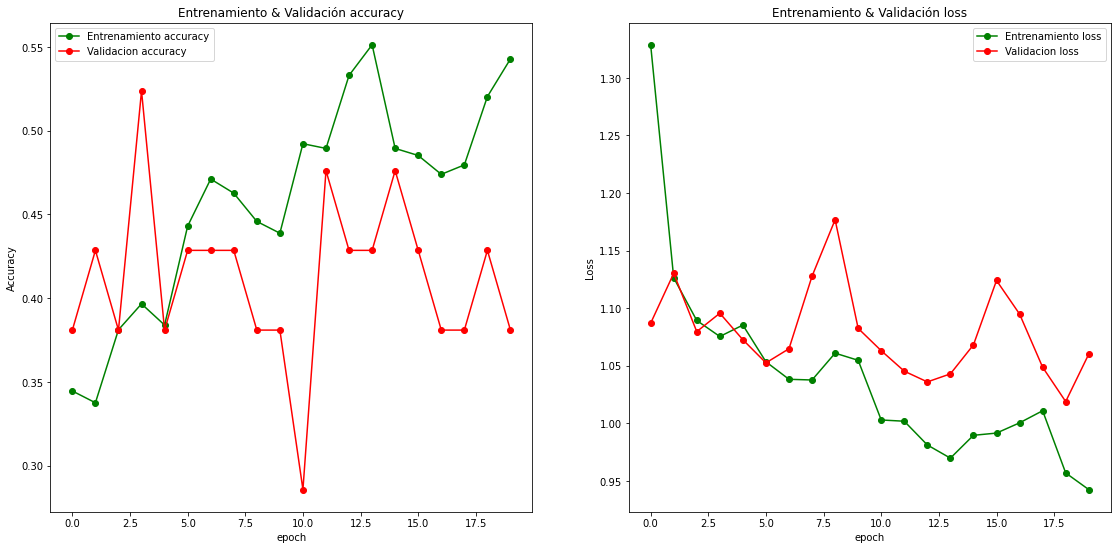

In [15]:
visualizacion_resultados(history)